In [1]:
import scipy.special as sc
import matplotlib.pyplot as plt

Вероятность, что произойдёт число ошибок, больше чем может распознасть код: $\sum\limits_{i=d}^n C_n^i p^i (1 - p)^{n - i}$

Мы просто ставим ошибки на $i$ позициях, которых хотя бы $d$

In [3]:
def get_error_prob(n, d, p):
    res = 0
    for i in range(d, n + 1):
        res += sc.comb(n, i, exact=True) * (p ** i) * ((1 - p) ** (n - i))
    return res

In [4]:
ns = [i for i in range(8, 42, 2)]
ks = [i for i in range(4, 21)]
ds = [4, 4, 4, 4, 5, 6, 6, 7, 8, 7, 8, 8, 8, 8, 8, 9, 10]

In [5]:
def get_error_data(p):
    return [get_error_prob(n, d, p) for n, d in zip(ns, ds)]

In [6]:
p1 = get_error_data(0.1)
p2 = get_error_data(0.01)
p3 = get_error_data(0.001)

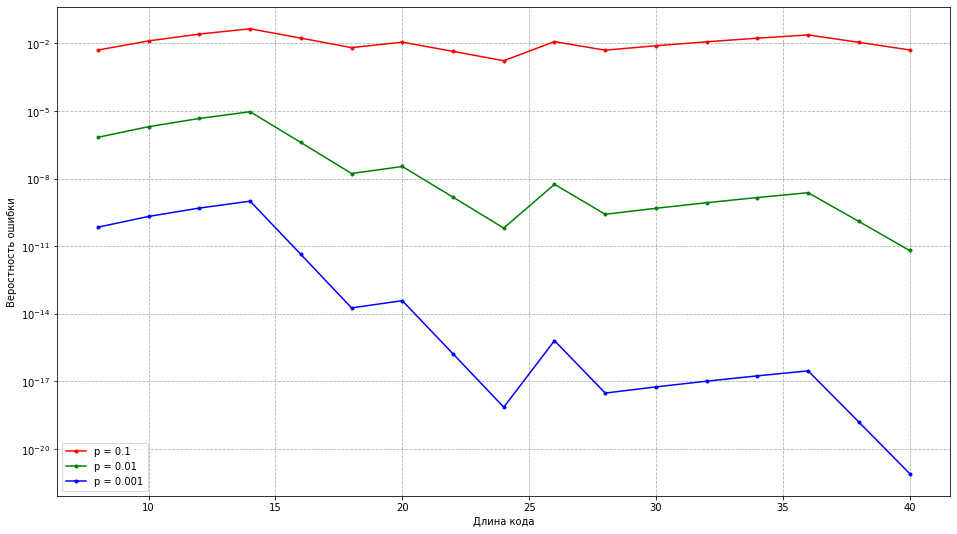

In [7]:
plt.figure(figsize=(16,9))
plt.grid(linestyle='--')
plt.semilogy(ns, p1, linestyle='-',marker='.',color='r', label='p = 0.1')
plt.semilogy(ns, p2, linestyle='-',marker='.',color='g', label='p = 0.01')
plt.semilogy(ns, p3, linestyle='-',marker='.',color='b', label='p = 0.001')
plt.xlabel('Длина кода')
plt.ylabel('Веростность ошибки')
plt.legend()
plt.show()

Пусть $N_0 = 500$. Посчитаем максмальный теоритиеский выигрыш при скорости кода $\dfrac{1}{2}$:

$Q(x) = 1 - \dfrac{1}{\sqrt{2 \pi}} \int\limits_0^x \exp^{- \frac{t^2}{2}} dt$

$p = Q\left(\sqrt{\dfrac{2 E_b}{N_0}}\right)$

При $p = 10^{-5}$, $x = 4.264$ 

Тогда $E_b = 4547.323$, а $E_s = R E_b = 2273.661$

Тогда энергетический выигыш: $\dfrac{E_b}{N_0} - \dfrac{E_s}{N_0} = 4.547$ Дб